# Assignment 7
# RCES
# Yianna Bekris
# 04/02/2024

In [229]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

In [230]:
import pooch
fname = '/data9/GR6901/data/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'

In [231]:
# Open the dataset and display its contents
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [232]:
# Print out the long_name attribute of each variable
for variable in ds.variables:
    long_name = ds.variables[variable].attrs.get('long_name', 'N/A')
    print(f'{variable.ljust(30)}: {long_name}')

lon                           : longitude
toa_sw_all_mon                : Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon                : Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon               : Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon                : Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon                : Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon               : Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon                : Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon                : Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon               : Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon                

In [233]:
# Calculate the time-mean of the entire dataset
time_mean = ds.mean(dim='time')
time_mean

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 122.3 122.3 ... 104.4 104.4
    toa_lw_all_mon               (lat, lon) float32 141.1 141.1 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.29 -91.29 ... -126.3
    toa_sw_clr_mon               (lat, lon) float32 119.9 119.9 ... 89.47 89.47
    toa_lw_clr_mon               (lat, lon) float32 140.2 140.2 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -88.03 -88.03 ... -117.6
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -3.253 -3.251 ... -8.651
    solar_mon                    (lat, lon) float32 172.1 172.1 ... 172.3 172.3
    cldarea_total_daynight_mon   (lat, lon) float32 51.52 51.52 ... 78.93 78.93
    cldpress_total_daynight_mon  (lat, lon) float32 486.5 486.5 ... 766.9 766.9
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.158 4.158 ... 4.821 4.821

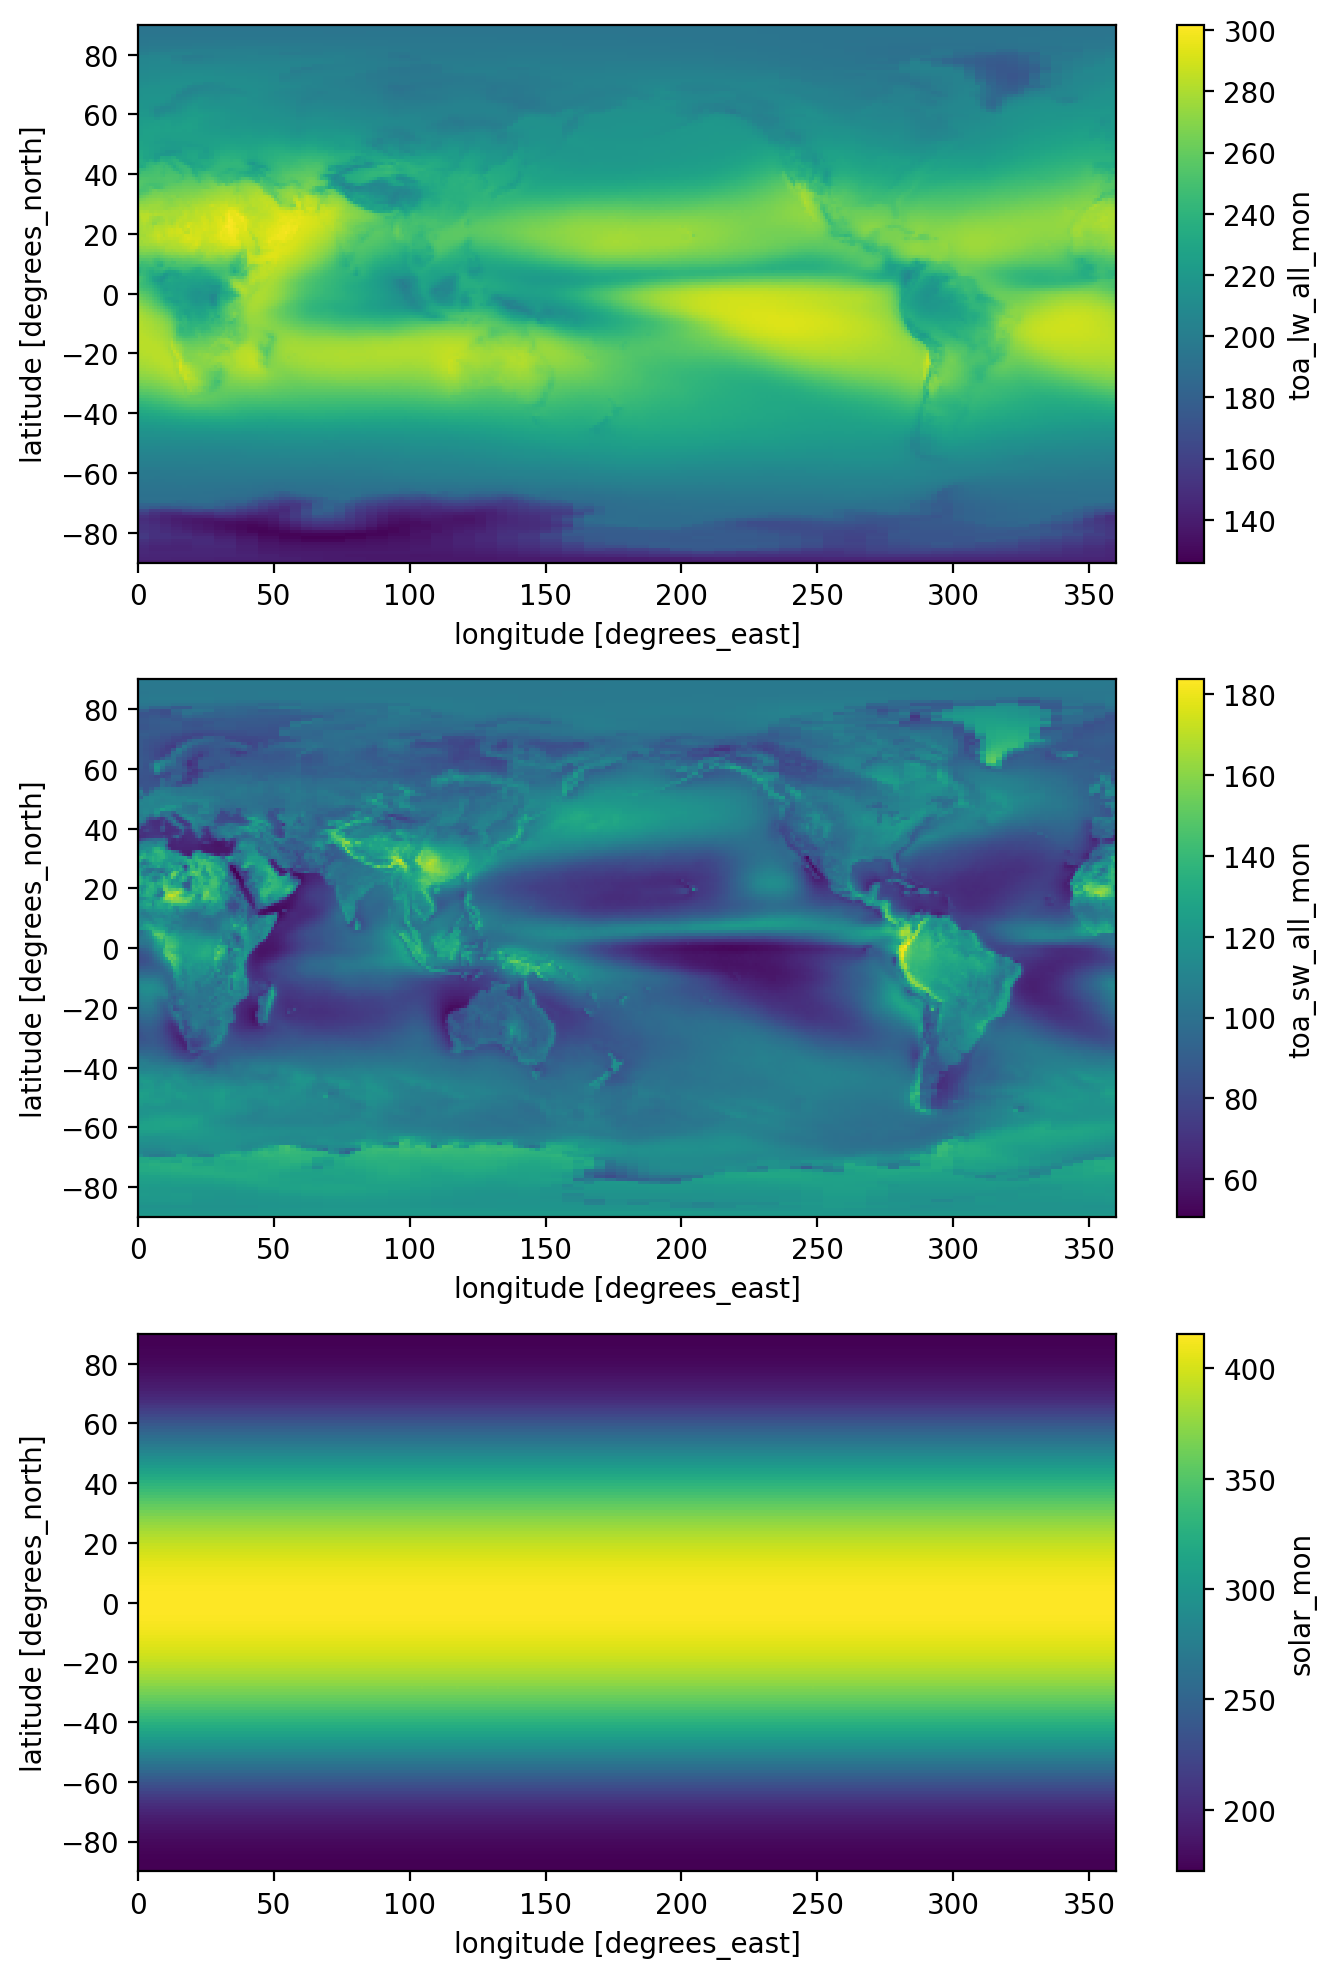

In [234]:
# From this, make a 2D plot of the the time-mean 
# Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation

plt.figure(figsize=(7,10))
plt.subplot(3,1,1)
time_mean.toa_lw_all_mon.plot()
plt.subplot(3,1,2)
time_mean.toa_sw_all_mon.plot()
plt.subplot(3,1,3)
time_mean.solar_mon.plot()
plt.tight_layout()

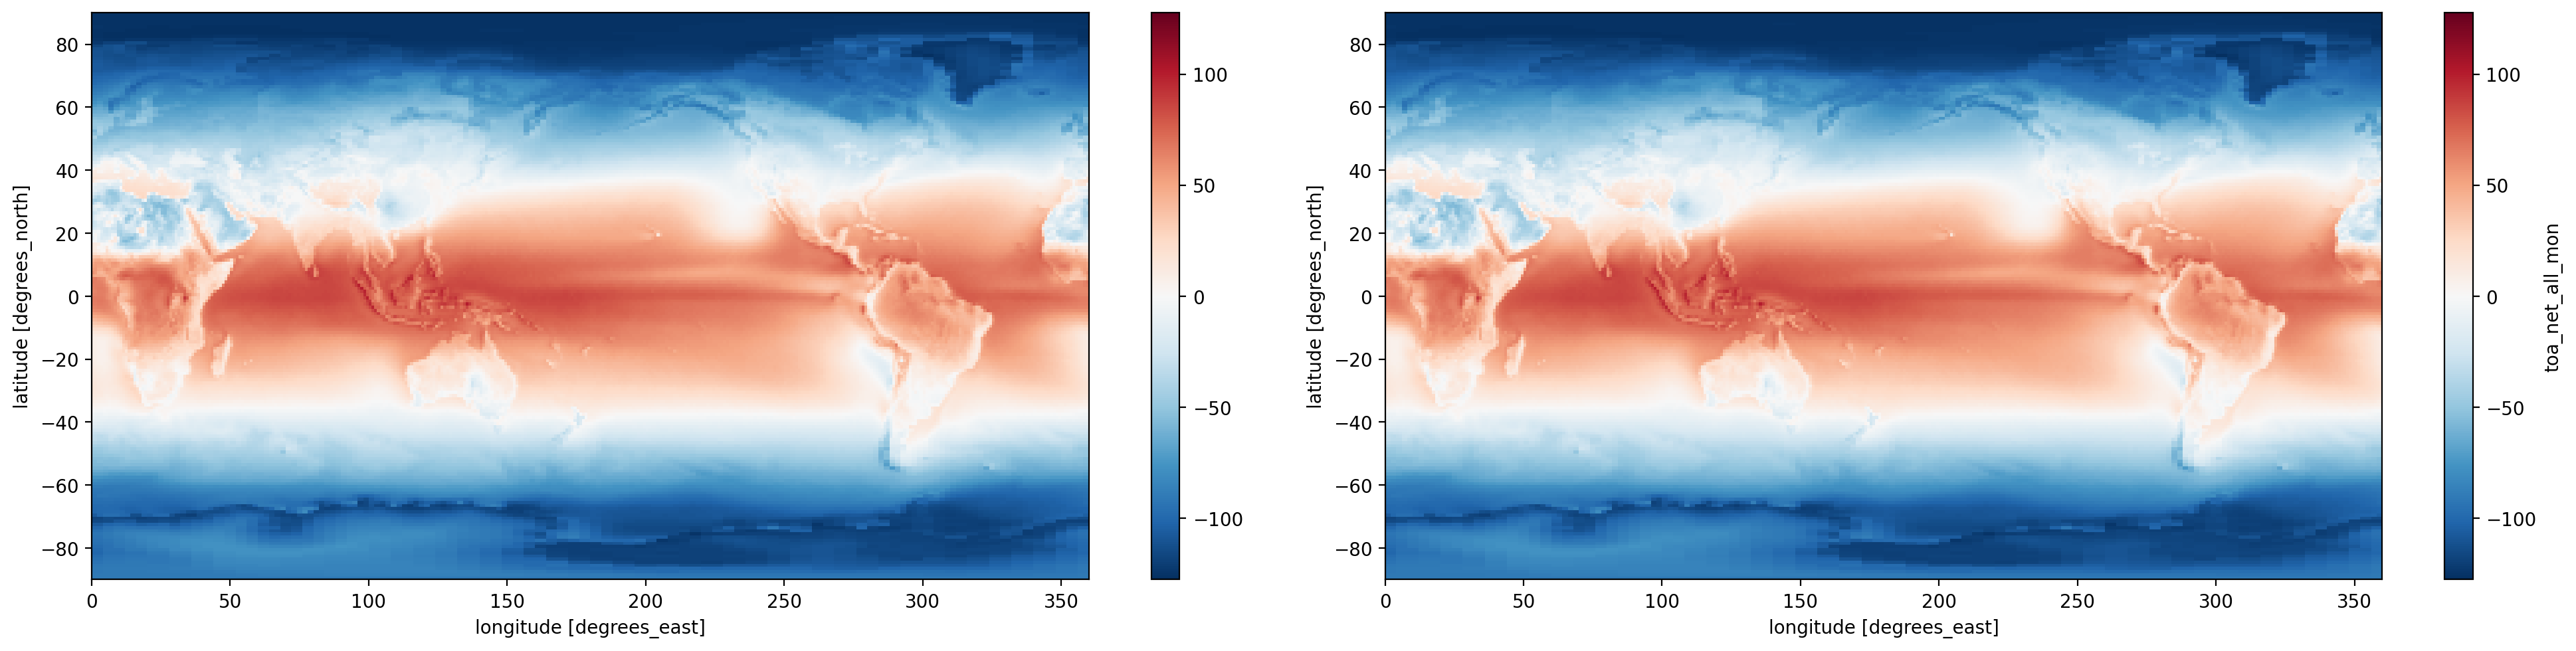

In [235]:
# Add up the three variables above and verify (visually) 
# that they are equivalent to the TOA net flux

manual_net_flux = time_mean.solar_mon - time_mean.toa_sw_all_mon - time_mean.toa_lw_all_mon

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
manual_net_flux.plot()
plt.subplot(1,2,2)
time_mean.toa_net_all_mon.plot()

plt.tight_layout()

In [236]:
# Calculate the global (unweighted) mean of TOA net radiation

unweighted_mean = ds.toa_net_all_mon.mean()
unweighted_mean

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729034, dtype=float32)

In [237]:
weights = np.cos(np.radians(ds.lat))

In [238]:
# Redo your global mean TOA net radiation calculation with this weight factor
# I am not sure our calculation is precise enough (not sure how to define precise),
# but at the same time it is positive indicating an altered energy budget 
# so it seems it did detect it.
weighted_ds = ds.toa_net_all_mon.weighted(weights)
weighted_ds.mean()

<xarray.DataArray 'toa_net_all_mon' ()>
array(0.8780852, dtype=float32)

In [239]:
# Now that you have a weight factor, verify that the TOA incoming solar, outgoing longwave, 
# and outgoing shortwave approximately match up with infographic shown in the first cell 
# of this assignment

# Upon looking at the infographic, I find these numbers match up well.

weighted_sw = ds.toa_sw_all_mon.weighted(weights)
print(f'TOA outgoing shortwave: {weighted_sw.mean()}')

weighted_lw = ds.toa_lw_all_mon.weighted(weights)
print(f'TOA outgoing longwave: {weighted_lw.mean()}')

weighted_sol = ds.solar_mon.weighted(weights)
print(f'TOA incoming solar: {weighted_sol.mean()}')

TOA outgoing shortwave: <xarray.DataArray 'toa_sw_all_mon' ()>
array(99.13806, dtype=float32)
TOA outgoing longwave: <xarray.DataArray 'toa_lw_all_mon' ()>
array(240.26692, dtype=float32)
TOA incoming solar: <xarray.DataArray 'solar_mon' ()>
array(340.28326, dtype=float32)


In [240]:
# Meridional Heat Transport Calculation
# calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it
# dA = R**2*cos(lambda) * dlambda * dphi

R = 6371 # km

xlon, ylat = np.meshgrid(ds.lon, ds.lat)

dlambda = np.deg2rad(np.gradient(ylat, axis=0))
dphi = np.deg2rad(np.gradient(xlon, axis=1))

dA = (R**2)* np.cos(np.radians(ylat)) * dlambda * dphi

area = xr.DataArray(dA, dims=('lat', 'lon'), coords={'lon': ds.lon, 'lat': ds.lat})

# Verify that the sum of all the pixels 
# equals the Earth’s true surface area as 
# evaluated using the formula for the area of a sphere
print(4*np.pi*R**2)
dA.sum()

510064471.90978825


510070941.6521716

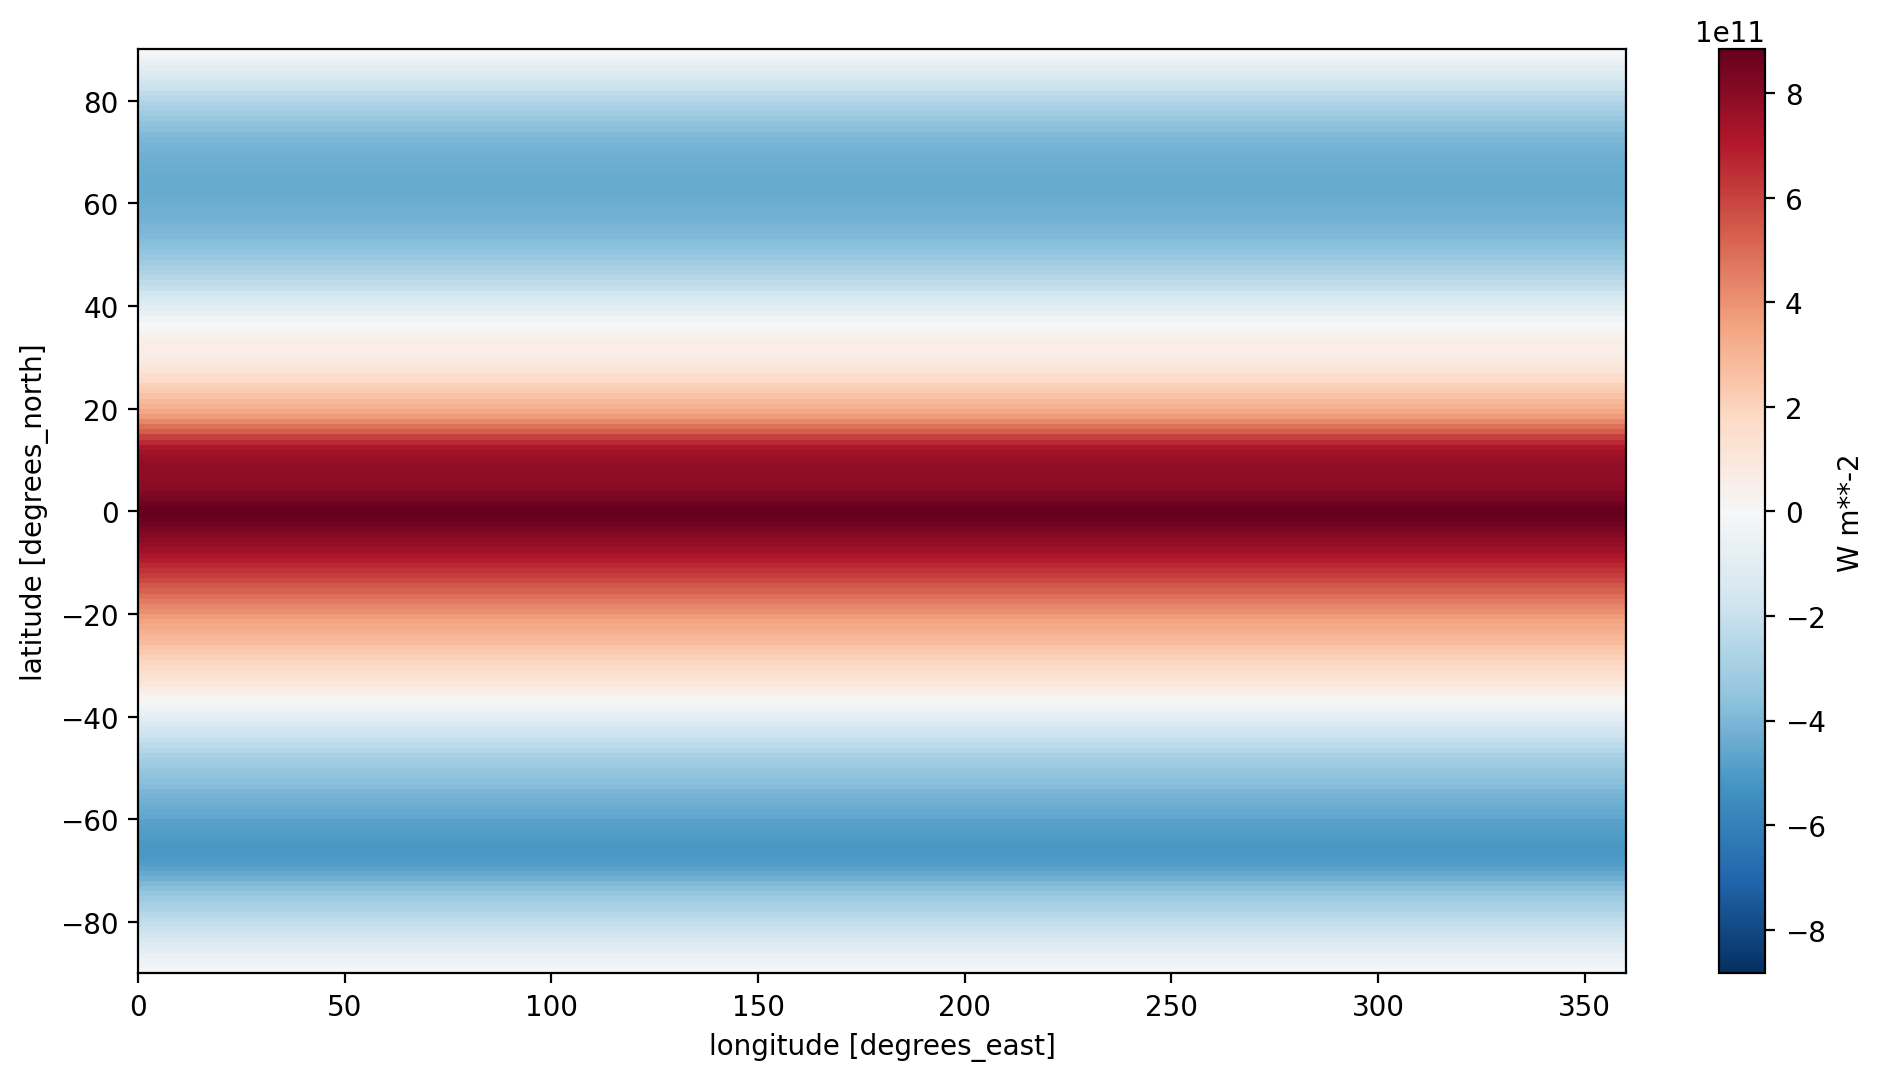

In [241]:
# Calculate and plot the total amount of net radiation in each 1-degree latitude band
area_m = area * 1e6
total_lat_rad = (area_m) * ds.toa_net_all_mon.mean(dim=('lon','time'))
total_lat_rad.plot(cbar_kwargs={'label': 'W m**-2'});

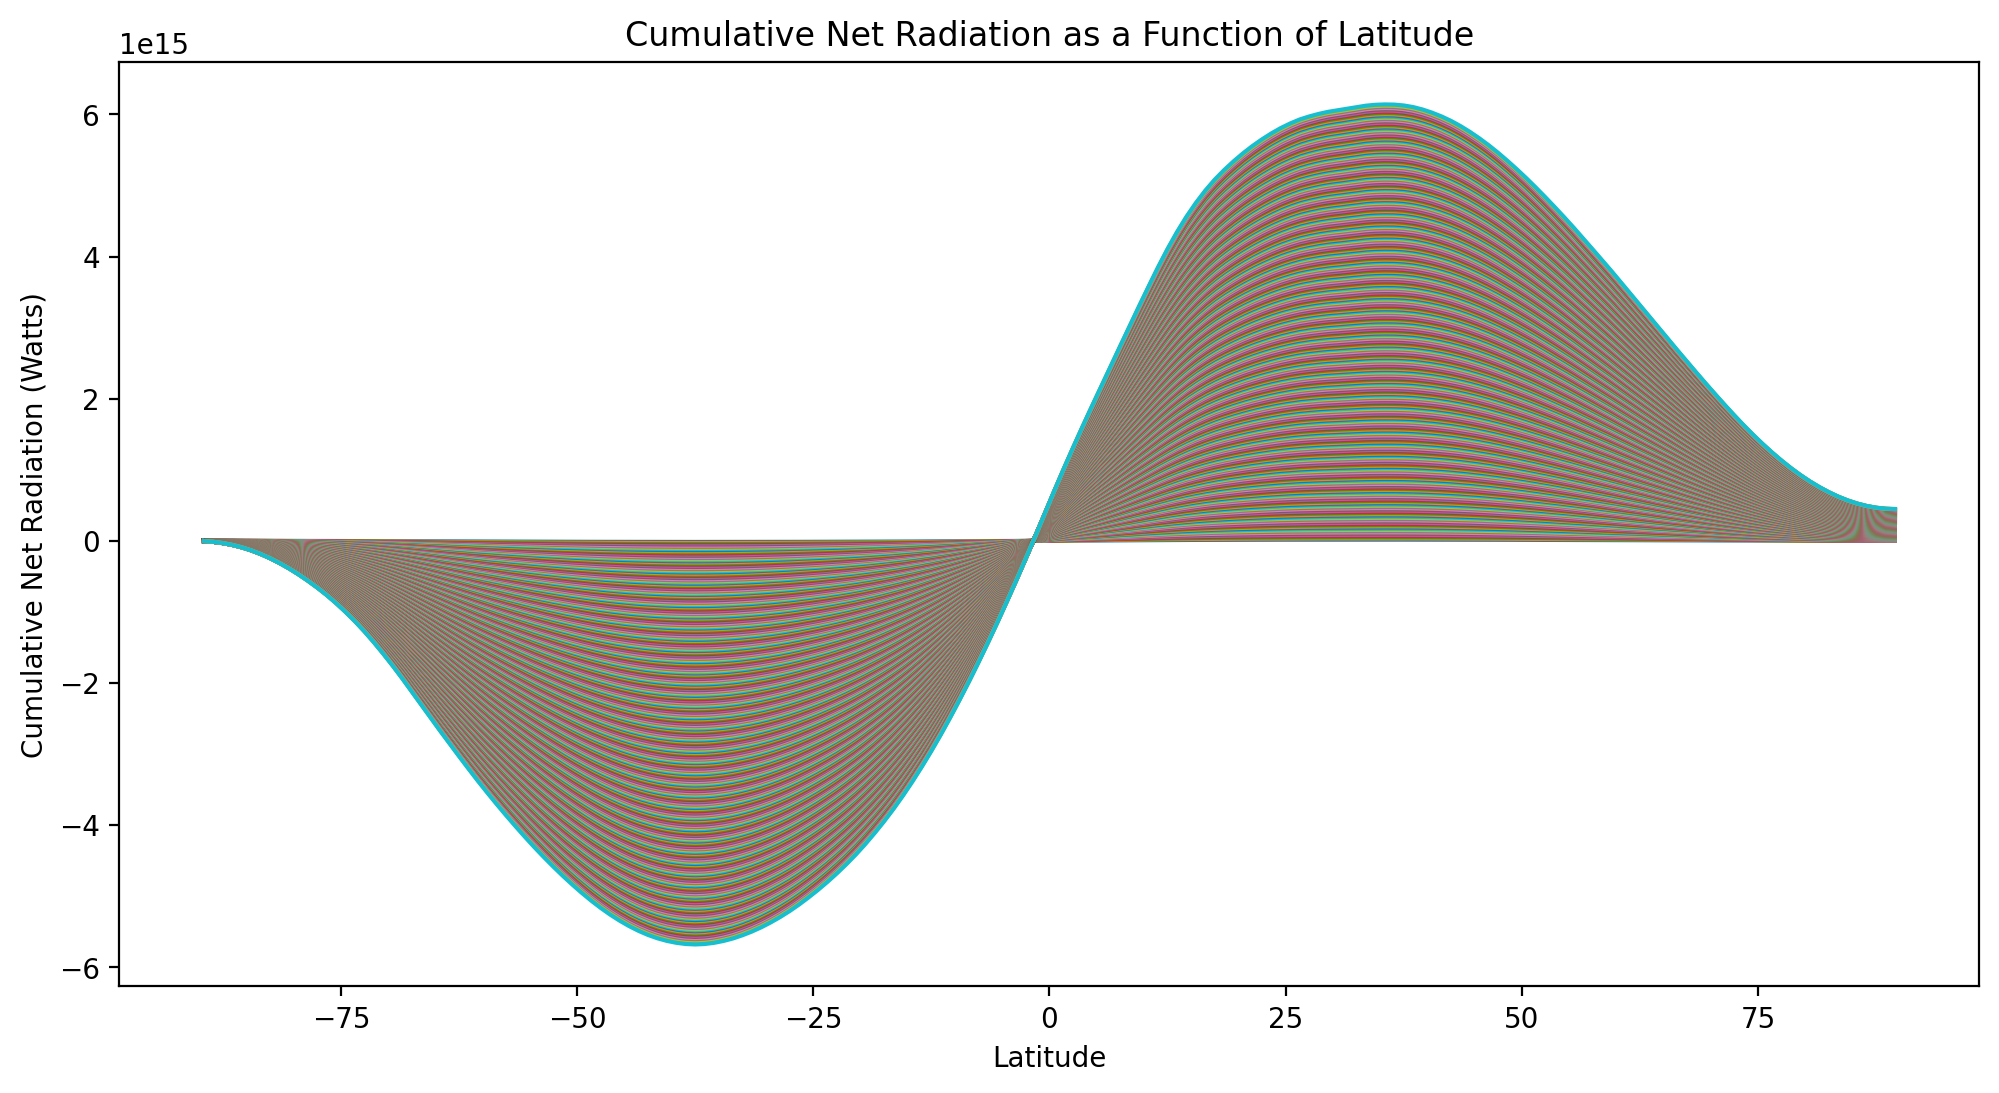

In [242]:
# Plot the cumulative sum of the total amount of net radiation as a function of latitude
cumsum_rad = total_lat_rad.cumsum()

plt.plot(cumsum_rad.lat, cumsum_rad);
plt.xlabel('Latitude');
plt.ylabel('Cumulative Net Radiation (Watts)');
plt.title('Cumulative Net Radiation as a Function of Latitude');


In [243]:
# Selecting and Merging Data
# Create a Dataset for each point from the global dataset

city_lons_180 = [-74, -165, 80, 147]
city_lats = [40, 64, 7, -43]
city_names = ['NYC', 'Nome', 'Colombo', 'Hobart']

city_lons = [(x + 360) % 360 for x in city_lons_180]

nyc_ds = ds.sel(lon=city_lons[0], lat=city_lats[0], method='nearest')
nome_ds = ds.sel(lon=city_lons[1], lat=city_lats[1], method='nearest')
colombo_ds = ds.sel(lon=city_lons[2], lat=city_lats[2], method='nearest')
hobart_ds = ds.sel(lon=city_lons[3], lat=city_lats[3], method='nearest')
nyc_ds

<xarray.Dataset>
Dimensions:                      (time: 203)
Coordinates:
    lon                          float32 286.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          float32 40.5
Data variables: (12/14)
    toa_sw_all_mon               (time) float32 89.36 155.3 ... 60.24 78.39
    toa_lw_all_mon               (time) float32 223.2 216.2 ... 214.4 206.9
    toa_net_all_mon              (time) float32 8.813 31.08 ... -119.4 -110.4
    toa_sw_clr_mon               (time) float32 38.75 47.61 ... 27.65 26.95
    toa_lw_clr_mon               (time) float32 253.2 259.4 ... 253.0 251.9
    toa_net_clr_mon              (time) float32 29.48 95.62 ... -125.3 -104.0
    ...                           ...
    toa_cre_net_mon              (time) float32 -20.66 -64.55 ... 5.924 -6.398
    solar_mon                    (time) float32 321.4 402.6 ... 155.3 174.9
    cldarea_total_daynight_mon   (time) float32 56.61 71.12 ... 63.98 76.57
    cldpress_total_daynight_mon  (time) float32 574.6 510.1 ... 519.5 552.7
    cldtemp_total_daynight_mon   (time) float32 250.3 247.7 ... 245.7 247.6
    cldtau_total_day_mon         (time) float32 5.157 11.39 ... 6.257 8.642
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

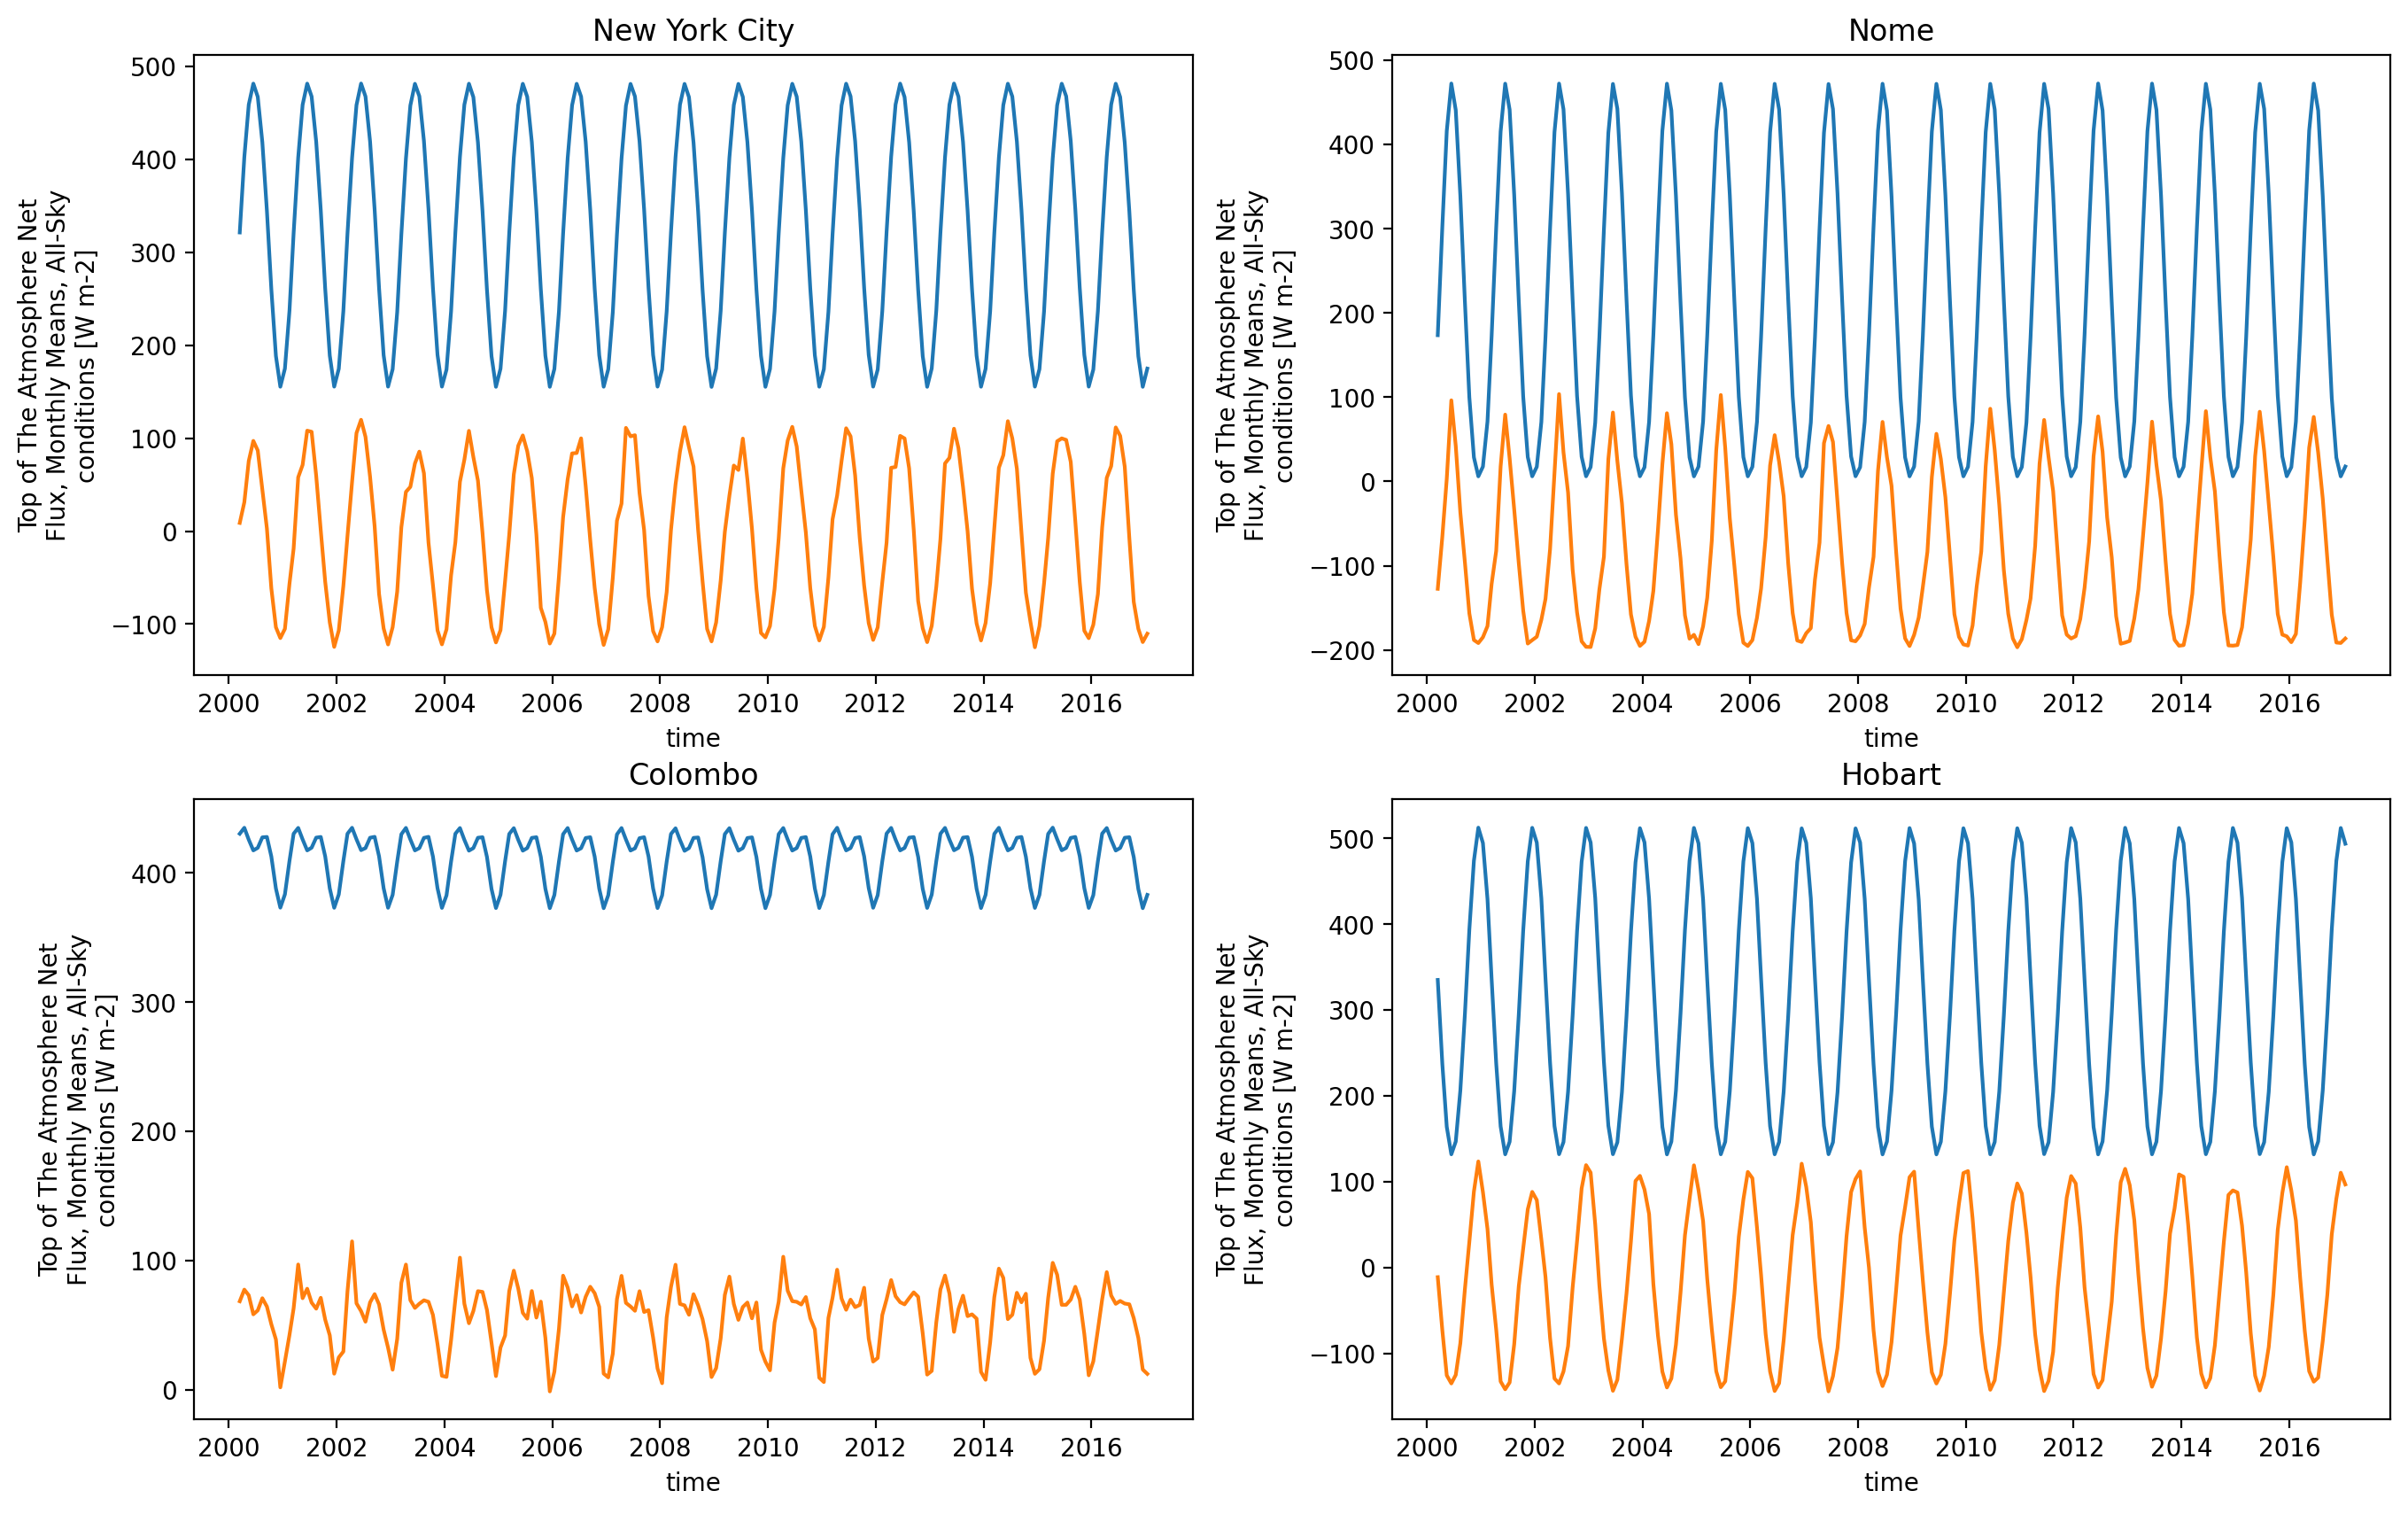

In [269]:
plt.figure(figsize=(16,10));

plt.subplot(2,2,1);
nyc_ds.solar_mon.plot();
nyc_ds.toa_net_all_mon.plot();
plt.title('New York City');

plt.subplot(2,2,2);
nome_ds.solar_mon.plot();
nome_ds.toa_net_all_mon.plot();
plt.title('Nome');

plt.subplot(2,2,3);
colombo_ds.solar_mon.plot();
colombo_ds.toa_net_all_mon.plot();
plt.title('Colombo');

plt.subplot(2,2,4);
hobart_ds.solar_mon.plot();
hobart_ds.toa_net_all_mon.plot();
plt.title('Hobart');


In [268]:
# Merge these four datasets into a new dataset with the new dimension city
cities_ds = xr.merge([nyc_ds, nome_ds, colombo_ds, hobart_ds], compat='override', combine_attrs='identical')

city_names = ['NYC', 'Nome', 'Colombo', 'Hobart']
cities_ds.coords['city'] = city_names
cities_ds.coords['lat'] = (('city',), [nyc_ds.lat, nome_ds.lat, colombo_ds.lat, hobart_ds.lat])
cities_ds.coords['lon'] = (('city',), [nyc_ds.lon, nome_ds.lon, colombo_ds.lon, hobart_ds.lon])

cities_ds

<xarray.Dataset>
Dimensions:                      (city: 4, time: 203)
Coordinates:
    lon                          (city) float32 286.5 195.5 80.5 147.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          (city) float32 40.5 64.5 7.5 -42.5
  * city                         (city) <U7 'NYC' 'Nome' 'Colombo' 'Hobart'
Data variables: (12/14)
    toa_sw_all_mon               (time) float32 89.36 155.3 ... 60.24 78.39
    toa_lw_all_mon               (time) float32 223.2 216.2 ... 214.4 206.9
    toa_net_all_mon              (time) float32 8.813 31.08 ... -119.4 -110.4
    toa_sw_clr_mon               (time) float32 38.75 47.61 ... 27.65 26.95
    toa_lw_clr_mon               (time) float32 253.2 259.4 ... 253.0 251.9
    toa_net_clr_mon              (time) float32 29.48 95.62 ... -125.3 -104.0
    ...                           ...
    toa_cre_net_mon              (time) float32 -20.66 -64.55 ... 5.924 -6.398
    solar_mon                    (time) float32 321.4 402.6 ... 155.3 174.9
    cldarea_total_daynight_mon   (time) float32 56.61 71.12 ... 63.98 76.57
    cldpress_total_daynight_mon  (time) float32 574.6 510.1 ... 519.5 552.7
    cldtemp_total_daynight_mon   (time) float32 250.3 247.7 ... 245.7 247.6
    cldtau_total_day_mon         (time) float32 5.157 11.39 ... 6.257 8.642
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

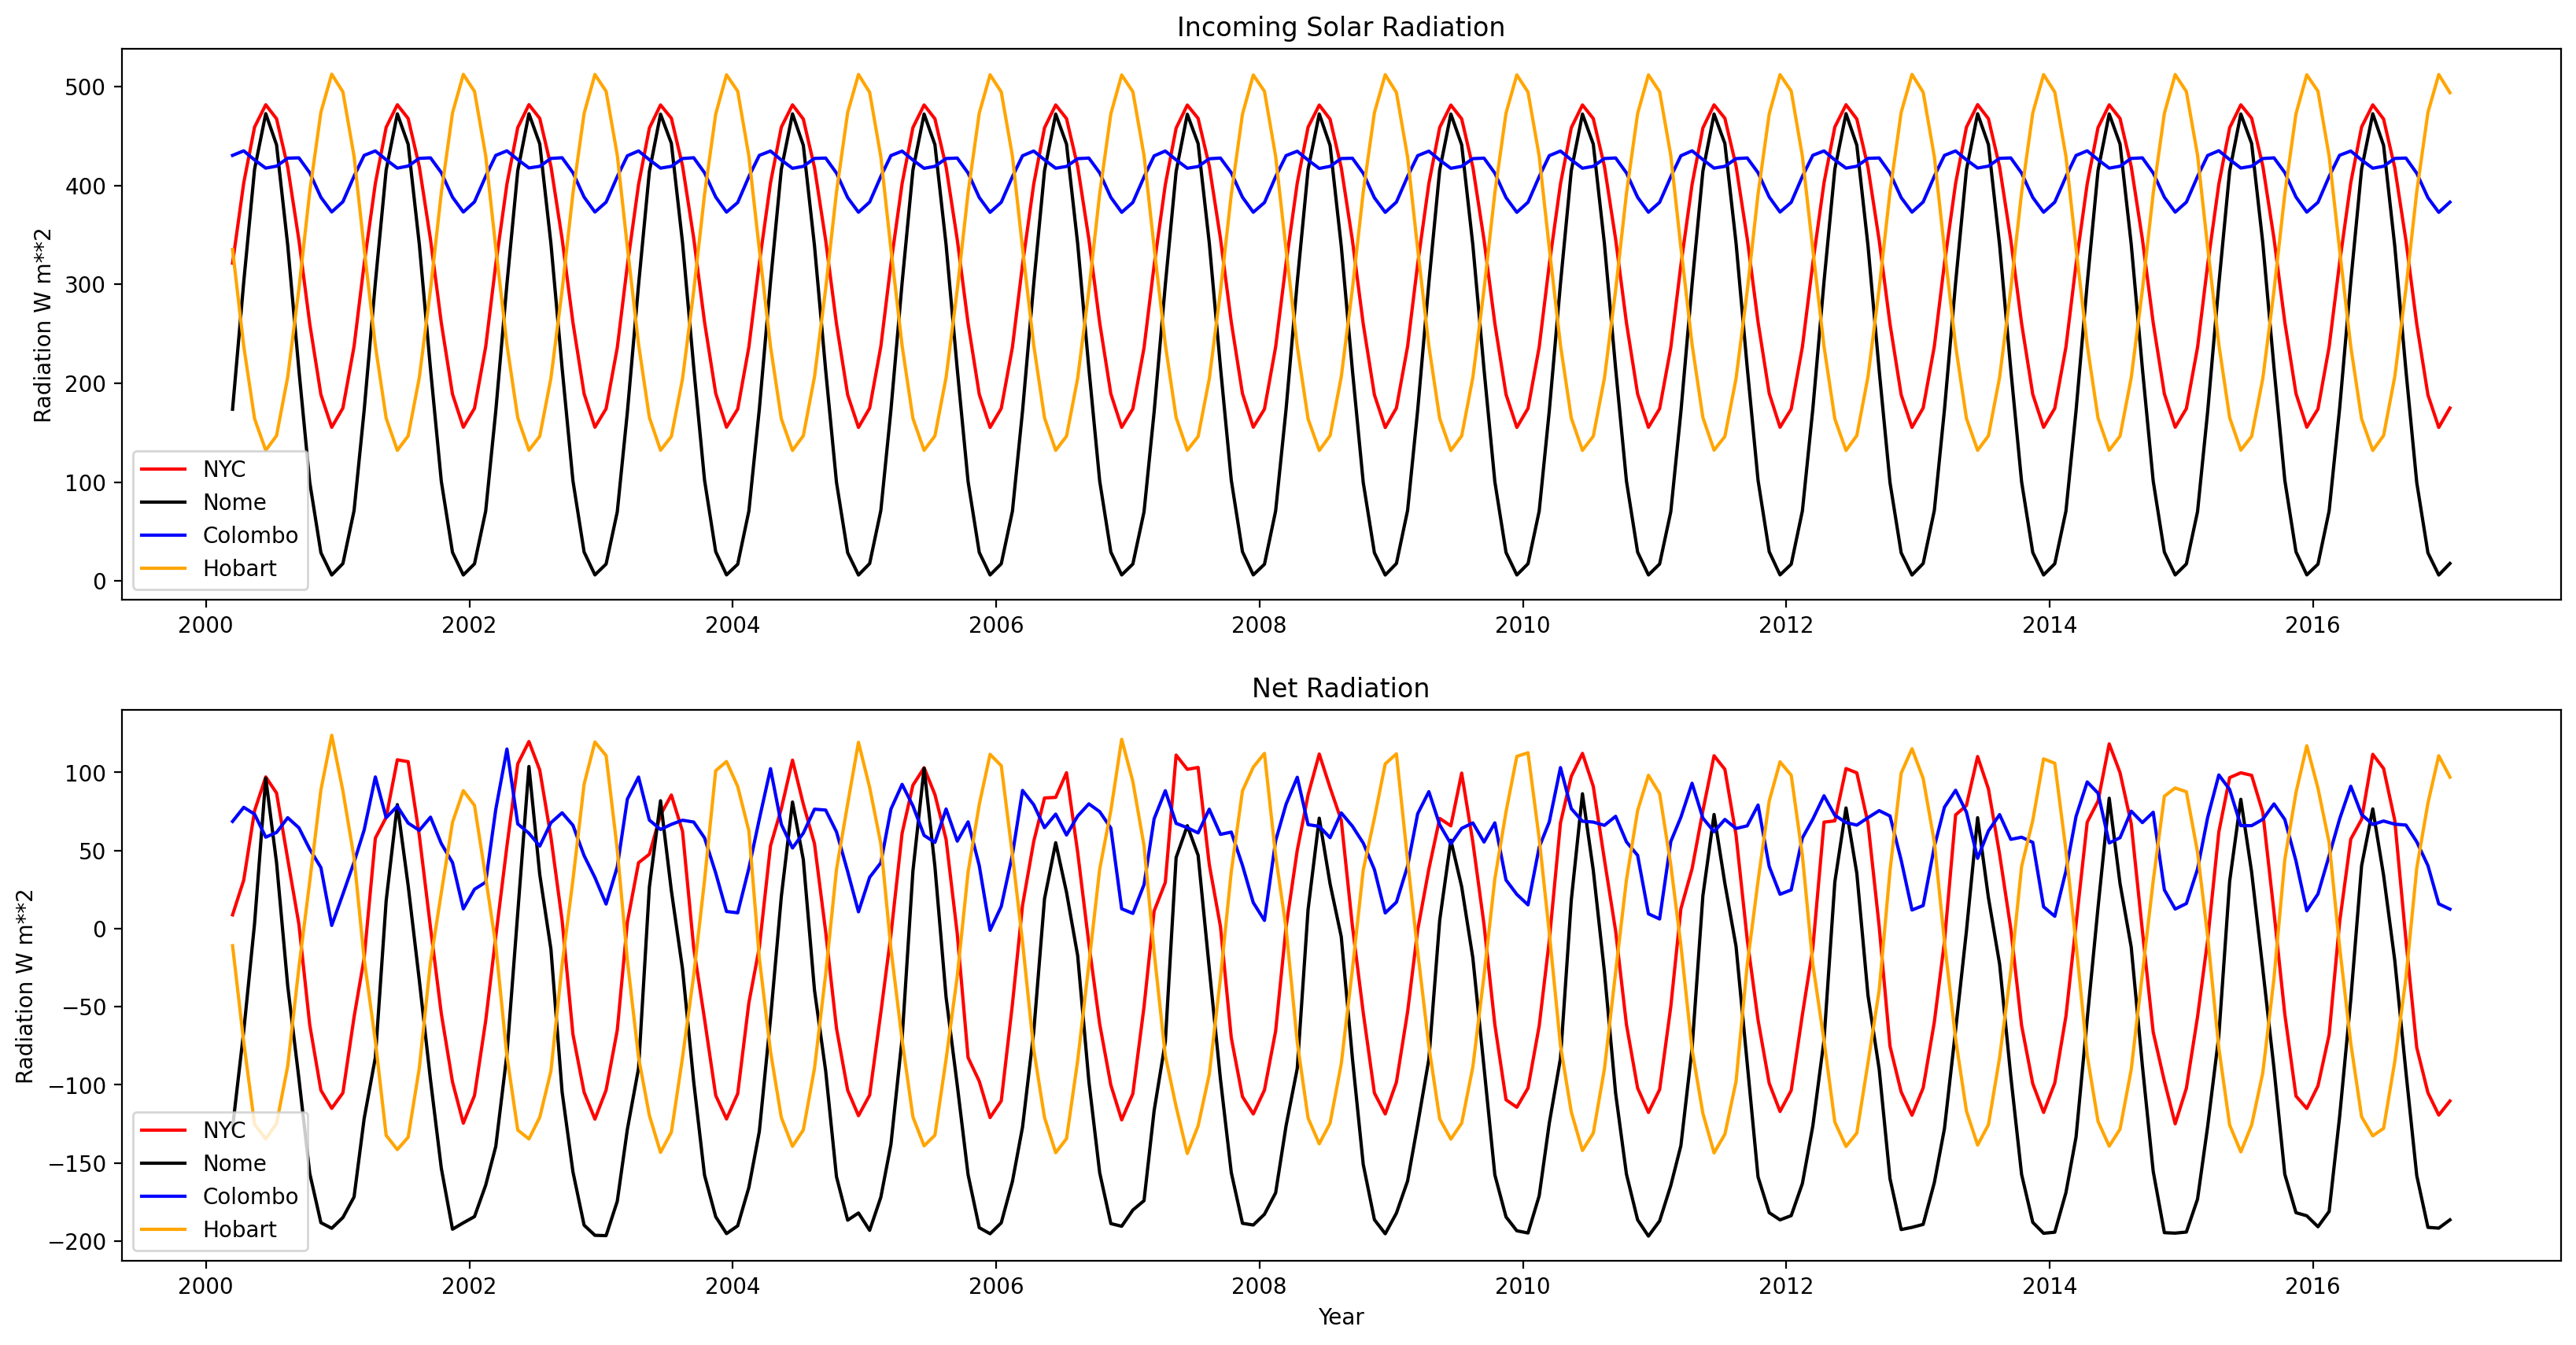

In [266]:
# Plot the incoming solar and net radiation at each city
plt.figure(figsize=(20,10));
plt.subplot(2,1,1);
plt.plot(nyc_ds.time, nyc_ds.solar_mon, color='red', label='NYC');
plt.plot(nome_ds.time, nome_ds.solar_mon, color='black', label='Nome');
plt.plot(colombo_ds.time, colombo_ds.solar_mon, color='blue', label='Colombo');
plt.plot(hobart_ds.time, hobart_ds.solar_mon, color='orange', label='Hobart');
plt.legend();
plt.ylabel('Radiation W m**2');
plt.title('Incoming Solar Radiation');

plt.subplot(2,1,2);
plt.plot(nyc_ds.time, nyc_ds.toa_net_all_mon, color='red', label='NYC');
plt.plot(nome_ds.time, nome_ds.toa_net_all_mon, color='black', label='Nome');
plt.plot(colombo_ds.time, colombo_ds.toa_net_all_mon, color='blue', label='Colombo');
plt.plot(hobart_ds.time, hobart_ds.toa_net_all_mon, color='orange', label='Hobart');
plt.legend();
plt.title('Net Radiation');
plt.ylabel('Radiation W m**2');
plt.xlabel('Year');
